In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)

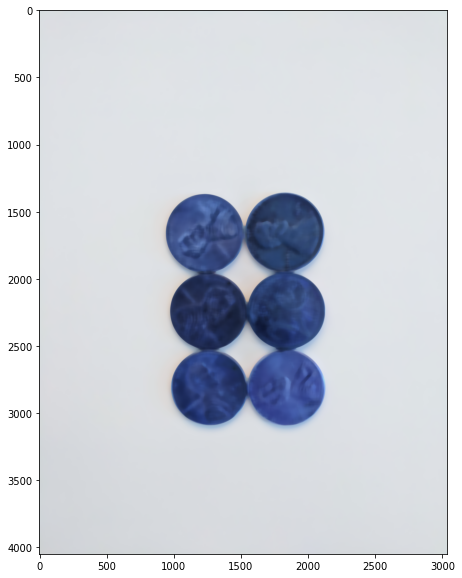

In [3]:
img = cv2.imread('../DATA/pennies.jpg')
img = cv2.medianBlur(img, 35) # if ypur image size is large, keep kernel size large.
display(img)

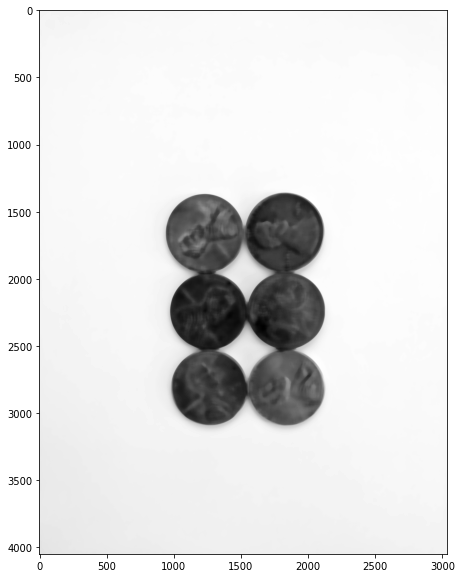

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(img_gray)

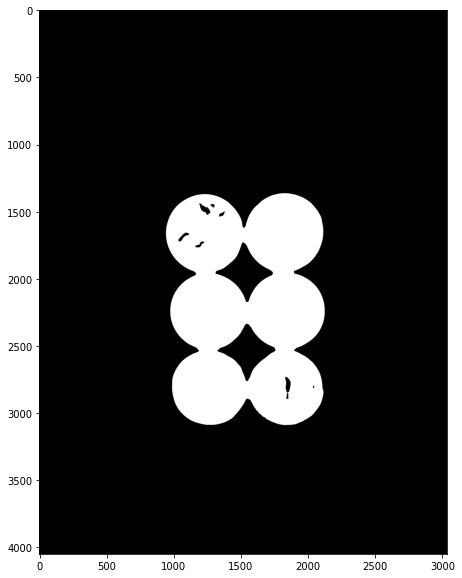

In [5]:
ret, th1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
display(th1)

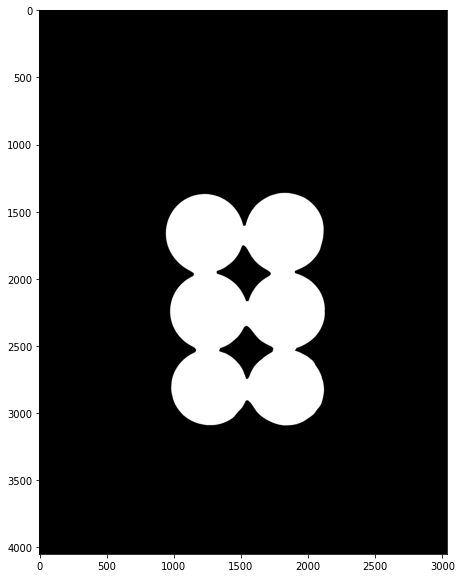

In [6]:
# Otsuu's Method
ret, th2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(th2)

# Noise Removal 

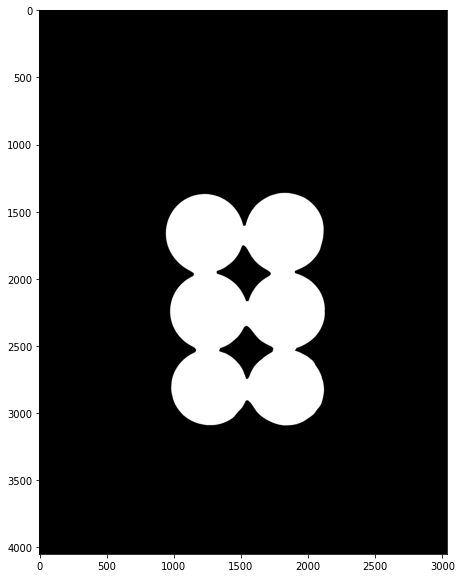

In [7]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(th2, cv2.MORPH_OPEN, kernel, iterations = 2)
display(opening)

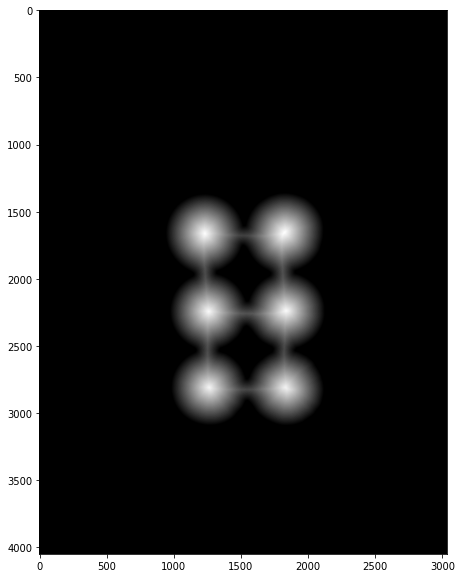

In [8]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
display(dist_transform)

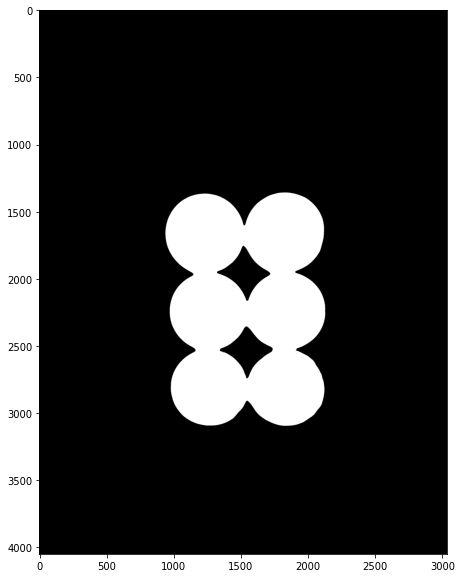

In [9]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)
display(sure_bg)

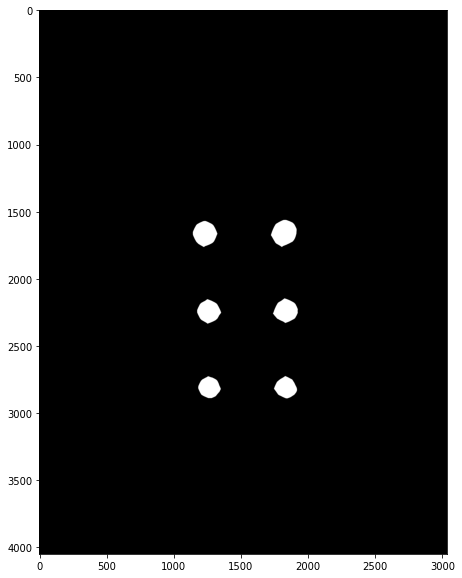

In [10]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
display(sure_fg)

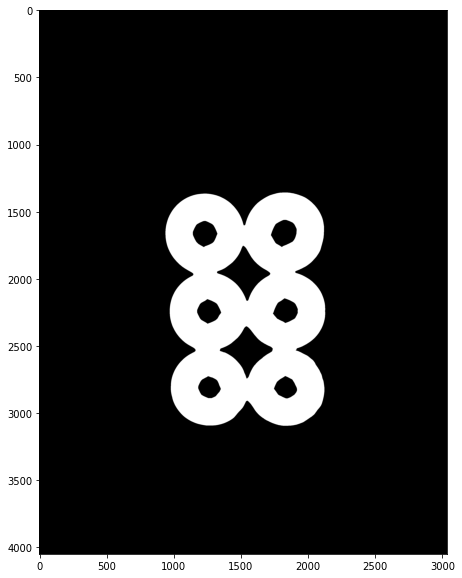

In [11]:
sure_fg = np.uint8(sure_fg)
unknown_region = cv2.subtract(sure_bg, sure_fg)
display(unknown_region)

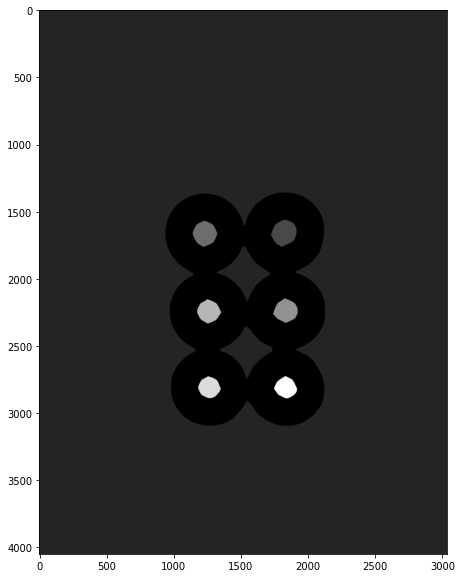

In [12]:
ret, markers = cv2.connectedComponents(sure_fg) # pass sure_fg because we wan to label six different regions
markers = markers + 1
markers[unknown_region == 255] = 0
display(markers)

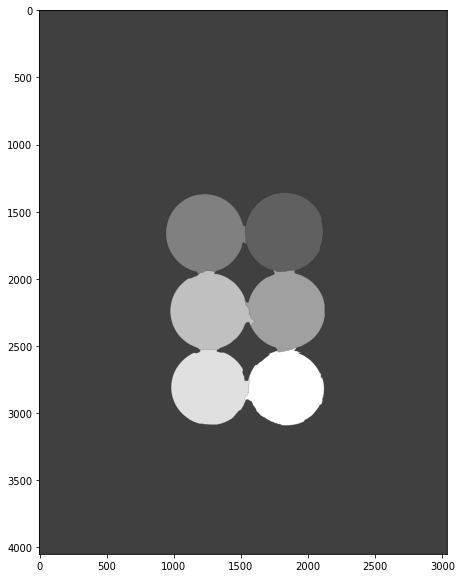

In [14]:
markers = cv2.watershed(img, markers)
display(markers)

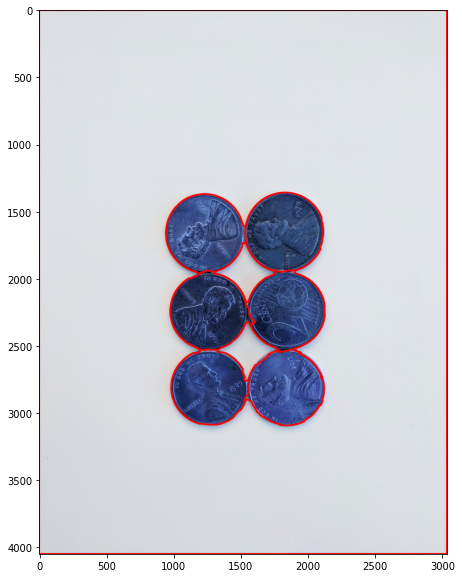

In [15]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
sep_coins = cv2.imread('../DATA/pennies.jpg')
# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)
display(sep_coins)